# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# print current directory
print(os.getcwd())

C:\Users\praka\Desktop\springboard\chapter6\guided_capstone


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

In [2]:
#loading data
df=pd.read_csv('data/step3_output.csv')

#creating dummy variables for categorical features
dummies=pd.get_dummies(df['state'],drop_first=True)
df=pd.concat([df.drop('state',axis=1),dummies],axis=1)

# Declaring features and a response variable
X = df.drop(['Name','AdultWeekend'], axis=1)
y = df.loc[:,'AdultWeekend']

#data scaling
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)
y = y.ravel()

#test_train splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=101)

# model fitting
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

#prediction
y_pred = model.predict(X_test)

# model evaluation
from sklearn.metrics import explained_variance_score,mean_absolute_error
print("Model Evaluation: \n    explained_varience_score:   "+str(explained_variance_score(y_test, y_pred))+"\n    mean_absolute_error:   " +str(mean_absolute_error(y_test, y_pred)))

print("\n")

# regression line results
print("intercept is: " +str(lm.intercept_))
print("\n")
coeff_df=pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False).head(10)
print("top 10 coefficients are: \n {}".format(coeff_df)) 

Model Evaluation: 
    explained_varience_score:   0.808470349631156
    mean_absolute_error:   6.0973183007046226


intercept is: 64.17843236505267


top 10 coefficients are: 
                 Coefficient
AdultWeekday      20.068299
summit_elev        2.451011
North Carolina     1.863661
Colorado           1.831065
NightSkiing_ac     1.588843
triple             1.531448
Montana            1.506014
fastQuads          1.480468
New Mexico         1.407427
Idaho              1.350295


**Result shows that the ticket price highly depends on the state. This can't be changed by the manager. Hence, some features needs to be dropped to get a working model.**

#### Best Model 

In [3]:
#loading data
df=pd.read_csv('data/step3_output.csv')

# Declaring features and a response variable
no_feat=['state','summit_elev', 'vertical_drop', 'averageSnowfall','yearsOpen','daysOpenLastYear','projectedDaysOpen'] # features that can't be controlled by management
X = df.drop(['Name','AdultWeekend']+no_feat, axis=1)
y = df.loc[:,'AdultWeekend']

#data scaling
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)
y = y.ravel()

#test_train splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=101)

# model fitting
lm = linear_model.LinearRegression()
best_model = lm.fit(X_train,y_train)

#prediction
y_pred = best_model.predict(X_test)

# model performance evaluation
from sklearn.metrics import explained_variance_score,mean_absolute_error
print("Model Evaluation: \n    explained_varience_score:   "+str(explained_variance_score(y_test, y_pred))+"\n    mean_absolute_error:   " +str(mean_absolute_error(y_test, y_pred)))

print("\n")

# regression line results
print("intercept is: " +str(lm.intercept_))
print("\n")
coeff_df=pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False).head(10)
print("top 10 coefficients are: \n {}".format(coeff_df)) 

Model Evaluation: 
    explained_varience_score:   0.8167326059237587
    mean_absolute_error:   6.017687740081119


intercept is: 64.08253991784082


top 10 coefficients are: 
                    Coefficient
AdultWeekday         20.701341
fastQuads             1.619320
SkiableTerrain_ac     1.511795
clusters              1.458534
NightSkiing_ac        1.446651
triple                1.313125
quad                  1.292257
surface               0.789038
fastSixes             0.663307
double                0.522565


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [4]:
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters


It seems that the resort is named differently: **Whitefish Mountain Resort**

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [5]:
wmr=df[df['Name'].str.contains('Whitefish Mountain Resort')]
wmr

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
150,Whitefish Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


In [6]:
cleaned_wmr=wmr.drop(['Name','AdultWeekend']+no_feat,axis=1)

In [7]:
cleaned_wmr.shape

(1, 16)

In [8]:
scaled_wmr=scaler.transform(cleaned_wmr)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [9]:
print("Predicted Weekend ticket price is: "+str( best_model.predict(scaled_wmr)[0].round(2)))

Predicted Weekend ticket price is: 92.81


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [10]:
print("Current Weekend ticket price is: "+str( wmr['AdultWeekend'].values[0]))

Current Weekend ticket price is: 81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

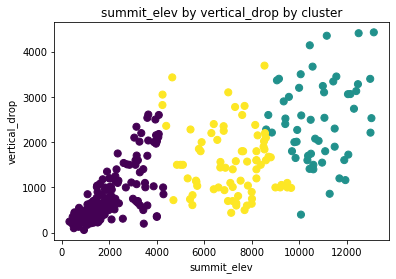

In [11]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

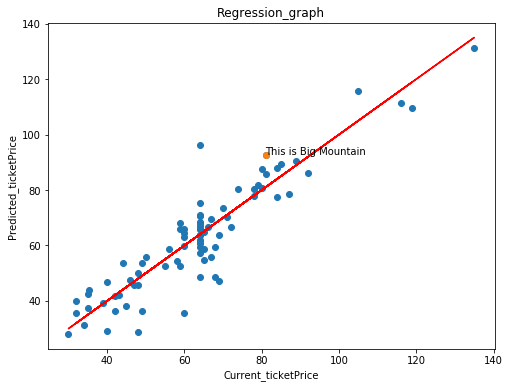

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.scatter(wmr['AdultWeekend'].values[0],best_model.predict(scaled_wmr)[0].round(2))
plt.text(wmr['AdultWeekend'].values[0],best_model.predict(scaled_wmr)[0].round(2),'This is Big Mountain')
plt.plot(y_test,y_test,'r')


plt.xlabel('Current_ticketPrice')
plt.ylabel('Predicted_ticketPrice')
plt.title('Regression_graph')
plt.savefig('figures/fig2.png',bbox_inches='tight')

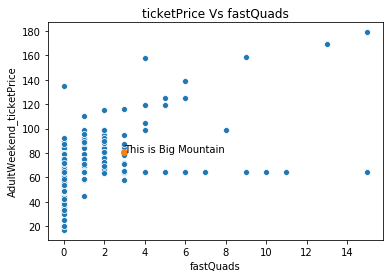

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(df['fastQuads'],df['AdultWeekend'])
plt.scatter(wmr['fastQuads'].values[0],wmr['AdultWeekend'].values[0])
plt.text(wmr['fastQuads'].values[0],wmr['AdultWeekend'].values[0],'This is Big Mountain')


plt.ylabel('AdultWeekend_ticketPrice')
plt.title('ticketPrice Vs fastQuads')
plt.savefig('figures/fig3.png',bbox_inches='tight')

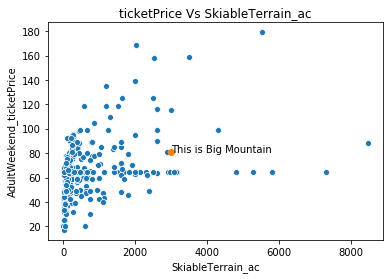

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(df['SkiableTerrain_ac'],df['AdultWeekend'])
plt.scatter(wmr['SkiableTerrain_ac'].values[0],wmr['AdultWeekend'].values[0])
plt.text(wmr['SkiableTerrain_ac'].values[0],wmr['AdultWeekend'].values[0],'This is Big Mountain')


plt.ylabel('AdultWeekend_ticketPrice')
plt.title('ticketPrice Vs SkiableTerrain_ac')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [15]:
import pickle
s = pickle.dumps(best_model)
from joblib import dump, load
dump(best_model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [16]:
modelPerf_df=pd.DataFrame(list(zip(['explained_varience_score','mean_absolute_error'],[explained_variance_score(y_test, y_pred).round(3), mean_absolute_error(y_test, y_pred).round(3)])), columns=['metrics', 'value'])
modelPerf_df
modelPerf_df.to_csv('data\Model_performance_score.csv',index=False)

In [17]:
coeff_df=pd.DataFrame(list(zip(X.columns.tolist(),abs(lm.coef_))), columns=['features','Coefficient']).sort_values('Coefficient', ascending=False)
coeff_df['intercept']=lm.intercept_
coeff_df

,features,Coefficient,intercept
13,AdultWeekday,20.701341,64.08254
3,fastQuads,1.619320,64.08254
11,SkiableTerrain_ac,1.511795,64.08254
15,clusters,1.458534,64.08254
14,NightSkiing_ac,1.446651,64.08254
5,triple,1.313125,64.08254
4,quad,1.292257,64.08254
7,surface,0.789038,64.08254
2,fastSixes,0.663307,64.08254
6,double,0.522565,64.08254


In [18]:
pivot=pd.pivot_table(coeff_df, values = 'Coefficient', index=['intercept', 'features'])
pivot.to_csv('data\Coeff and Intercept.csv')
pivot

Coefficient
intercept features                      
64.08254  AdultWeekday         20.701341
          LongestRun_mi         0.151094
          NightSkiing_ac        1.446651
          Runs                  0.209600
          SkiableTerrain_ac     1.511795
          Snow Making_ac        0.110483
          TerrainParks          0.029086
          clusters              1.458534
          double                0.522565
          fastEight             0.104972
          fastQuads             1.619320
          fastSixes             0.663307
          quad                  1.292257
          surface               0.789038
          trams                 0.129261
          triple                1.313125